In [10]:
##Before anything, set your working directory
import os
os.chdir("C:/Users/Ezinne/Desktop/nassCDS")
os.getcwd()

'C:\\Users\\Ezinne\\Desktop\\nassCDS'

### An analysis of the influence of Airbags and other factors in accident fatalities among front seat passengers 

In [11]:
##Import the required libraries to be used for the analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

plt.style.use('bmh')

In [12]:
##First we begin by reading in the data for the analysis

nassCDS = pd.read_csv("nassCDS.csv")

nassCDS.head(5)

,Unnamed: 0,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,1,25-39,25.069,alive,none,belted,1,f,26,1997,1990.0,unavail,driver,0,3.0,2:3:1
1,2,10-24,25.069,alive,airbag,belted,1,f,72,1997,1995.0,deploy,driver,1,1.0,2:3:2
2,3,10-24,32.379,alive,none,none,1,f,69,1997,1988.0,unavail,driver,0,4.0,2:5:1
3,4,25-39,495.444,alive,airbag,belted,1,f,53,1997,1995.0,deploy,driver,1,1.0,2:10:1
4,5,25-39,25.069,alive,none,belted,1,f,32,1997,1988.0,unavail,driver,0,3.0,2:11:1


In [4]:
##Check out the dimensions of the data
nassCDS.shape

(26217, 16)

##### The above code produces the dimensions to the data, which shows that this is a dataframe with 26217 rows and 16 columns of data 

In [5]:
##Obtain summary statistics of the various variables that make up the data
print(nassCDS.describe())
print(nassCDS.describe(include = np.object))

##Alternatively nassCDS.count() gives the count of values in each variable

        Unnamed: 0        weight       frontal      ageOFocc       yearacc  \
count  26217.00000  26217.000000  26217.000000  26217.000000  26217.000000   
mean   13109.00000    462.811611      0.643323     37.206202   1999.555556   
std     7568.34034   1524.844430      0.479027     17.909317      1.702546   
min        1.00000      0.000000      0.000000     16.000000   1997.000000   
25%     6555.00000     32.467000      0.000000     22.000000   1998.000000   
50%    13109.00000     86.986000      1.000000     33.000000   2000.000000   
75%    19663.00000    364.717000      1.000000     48.000000   2001.000000   
max    26217.00000  57871.595000      1.000000     97.000000   2002.000000   

            yearVeh        deploy   injSeverity  
count  26216.000000  26217.000000  26064.000000  
mean    1992.804699      0.337033      1.715508  
std        5.594990      0.472705      1.293357  
min     1953.000000      0.000000      0.000000  
25%     1989.000000      0.000000      1.000000

In [6]:
##Another way of having a quick look at the data is through the 'info' method

nassCDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26217 entries, 0 to 26216
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   26217 non-null  int64  
 1   dvcat        26217 non-null  object 
 2   weight       26217 non-null  float64
 3   dead         26217 non-null  object 
 4   airbag       26217 non-null  object 
 5   seatbelt     26217 non-null  object 
 6   frontal      26217 non-null  int64  
 7   sex          26217 non-null  object 
 8   ageOFocc     26217 non-null  int64  
 9   yearacc      26217 non-null  int64  
 10  yearVeh      26216 non-null  float64
 11  abcat        26217 non-null  object 
 12  occRole      26217 non-null  object 
 13  deploy       26217 non-null  int64  
 14  injSeverity  26064 non-null  float64
 15  caseid       26217 non-null  object 
dtypes: float64(3), int64(5), object(8)
memory usage: 3.2+ MB


In [15]:
##We can investigate further the types of data that is contained in each variable

nassCDS.dtypes

Unnamed: 0       int64
dvcat           object
weight         float64
dead            object
airbag          object
seatbelt        object
frontal          int64
sex             object
ageOFocc         int64
yearacc          int64
yearVeh        float64
abcat           object
occRole         object
deploy           int64
injSeverity    float64
caseid          object
dtype: object

In [6]:
##Check for missing values

nassCDS.isnull().sum()

Unnamed: 0       0
dvcat            0
weight           0
dead             0
airbag           0
seatbelt         0
frontal          0
sex              0
ageOFocc         0
yearacc          0
yearVeh          1
abcat            0
occRole          0
deploy           0
injSeverity    153
caseid           0
dtype: int64

#### The above shows that a good majority (13 out of 15) of the variables do not contain any missing value. The 'yearVeh' variable is
#### missing one value, while 'injSeverity' has a total of 153 missing values

In [7]:
##Create a Frequency table of the 'weight' variable

nassCDS['weight'].value_counts(sort = False) 

##Alternatively : nassCDS.groupby('weight').size()

0.000      212
1.000       65
148.497      2
84.251       5
353.005      2
          ... 
702.016      2
287.993      1
711.154      1
476.732      4
151.994      1
Name: weight, Length: 10131, dtype: int64

In [8]:
##To express the frequency as percentages or proportions

nassCDS['weight'].value_counts(sort = False, normalize = True)

##Alternatively: nassCDS.groupby('weight').size() * 100/len('weight')

0.000      0.008086
1.000      0.002479
148.497    0.000076
84.251     0.000191
353.005    0.000076
             ...   
702.016    0.000076
287.993    0.000038
711.154    0.000038
476.732    0.000153
151.994    0.000038
Name: weight, Length: 10131, dtype: float64

In [16]:
#Make a copy of the data

nassCDS2 = nassCDS.drop(['Unnamed: 0'], axis = 1)

nassCDS2.head(5)

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,25-39,25.069,alive,none,belted,1,f,26,1997,1990.0,unavail,driver,0,3.0,2:3:1
1,10-24,25.069,alive,airbag,belted,1,f,72,1997,1995.0,deploy,driver,1,1.0,2:3:2
2,10-24,32.379,alive,none,none,1,f,69,1997,1988.0,unavail,driver,0,4.0,2:5:1
3,25-39,495.444,alive,airbag,belted,1,f,53,1997,1995.0,deploy,driver,1,1.0,2:10:1
4,25-39,25.069,alive,none,belted,1,f,32,1997,1988.0,unavail,driver,0,3.0,2:11:1


In [17]:
##Rename the Columns to make it more understandable

nassCDS2 = nassCDS2.rename(columns = {"dvcat": "Speed Impact", "weight": "Weight", "dead": "Fatality", "airbag": "AirBag",
                                     "seatbelt": "Seatbelt", "frontal": "Frontal", "sex": "Sex", "ageOFocc": "Pass Age",
                                     "yearacc": "Accident Year", "yearVeh": "YearVeh", "abcat": "Abcat", "occRole": "Role",
                                     "deploy": "Airbag Deploy", "injSeverity": "InjSeverity", "caseid": "CaseID"})

nassCDS2.set_index("CaseID", inplace = True)  ##Set "CaesID" as the index column

nassCDS2.head(5)

,Speed Impact,Weight,Fatality,AirBag,Seatbelt,Frontal,Sex,Pass Age,Accident Year,YearVeh,Abcat,Role,Airbag Deploy,InjSeverity
CaseID,,,,,,,,,,,,,,
2:3:1,25-39,25.069,alive,none,belted,1,f,26,1997,1990.0,unavail,driver,0,3.0
2:3:2,10-24,25.069,alive,airbag,belted,1,f,72,1997,1995.0,deploy,driver,1,1.0
2:5:1,10-24,32.379,alive,none,none,1,f,69,1997,1988.0,unavail,driver,0,4.0
2:10:1,25-39,495.444,alive,airbag,belted,1,f,53,1997,1995.0,deploy,driver,1,1.0
2:11:1,25-39,25.069,alive,none,belted,1,f,32,1997,1988.0,unavail,driver,0,3.0


In [9]:
##Investigate all the categorical variables
nassCDS2["Speed Impact"].value_counts(sort = False, normalize = True)

10-24      0.490064
1-9km/h    0.026166
25-39      0.313308
55+        0.056910
40-54      0.113552
Name: Speed Impact, dtype: float64

In [10]:
nassCDS2['Fatality'].value_counts(normalize = True)

alive    0.954991
dead     0.045009
Name: Fatality, dtype: float64

In [11]:
nassCDS2['Seatbelt'].value_counts(sort = False, normalize = True)

belted    0.708433
none      0.291567
Name: Seatbelt, dtype: float64

In [17]:
nassCDS2['Airbag Deploy'].value_counts(normalize = True)

0    0.662967
1    0.337033
Name: Airbag Deploy, dtype: float64

In [18]:
nassCDS2['Role'].value_counts(normalize = True)

driver    0.785788
pass      0.214212
Name: Role, dtype: float64

In [19]:
nassCDS2['Sex'].value_counts(normalize = True)

m    0.532822
f    0.467178
Name: Sex, dtype: float64

In [20]:
nassCDS2['Abcat'].value_counts(normalize = True)

unavail     0.450013
deploy      0.337033
nodeploy    0.212953
Name: Abcat, dtype: float64

In [21]:
nassCDS2['AirBag'].value_counts(normalize = True)

airbag    0.549987
none      0.450013
Name: AirBag, dtype: float64

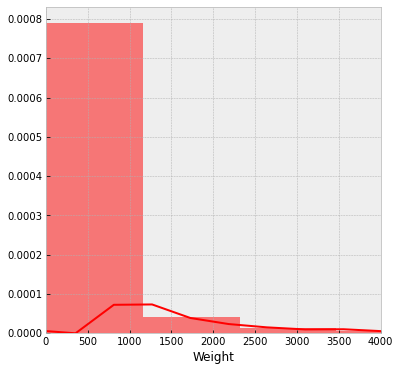

In [11]:
##A Histogram of the 'Weight' variable..
plt.figure(figsize = (6, 6))
plt.xlim(0,4000)
sns.distplot(nassCDS2['Weight'], color = 'red', bins = 50, hist_kws = {'alpha': 0.5})
##To remove the Kernel density estimation, set the 'kde' argument to false

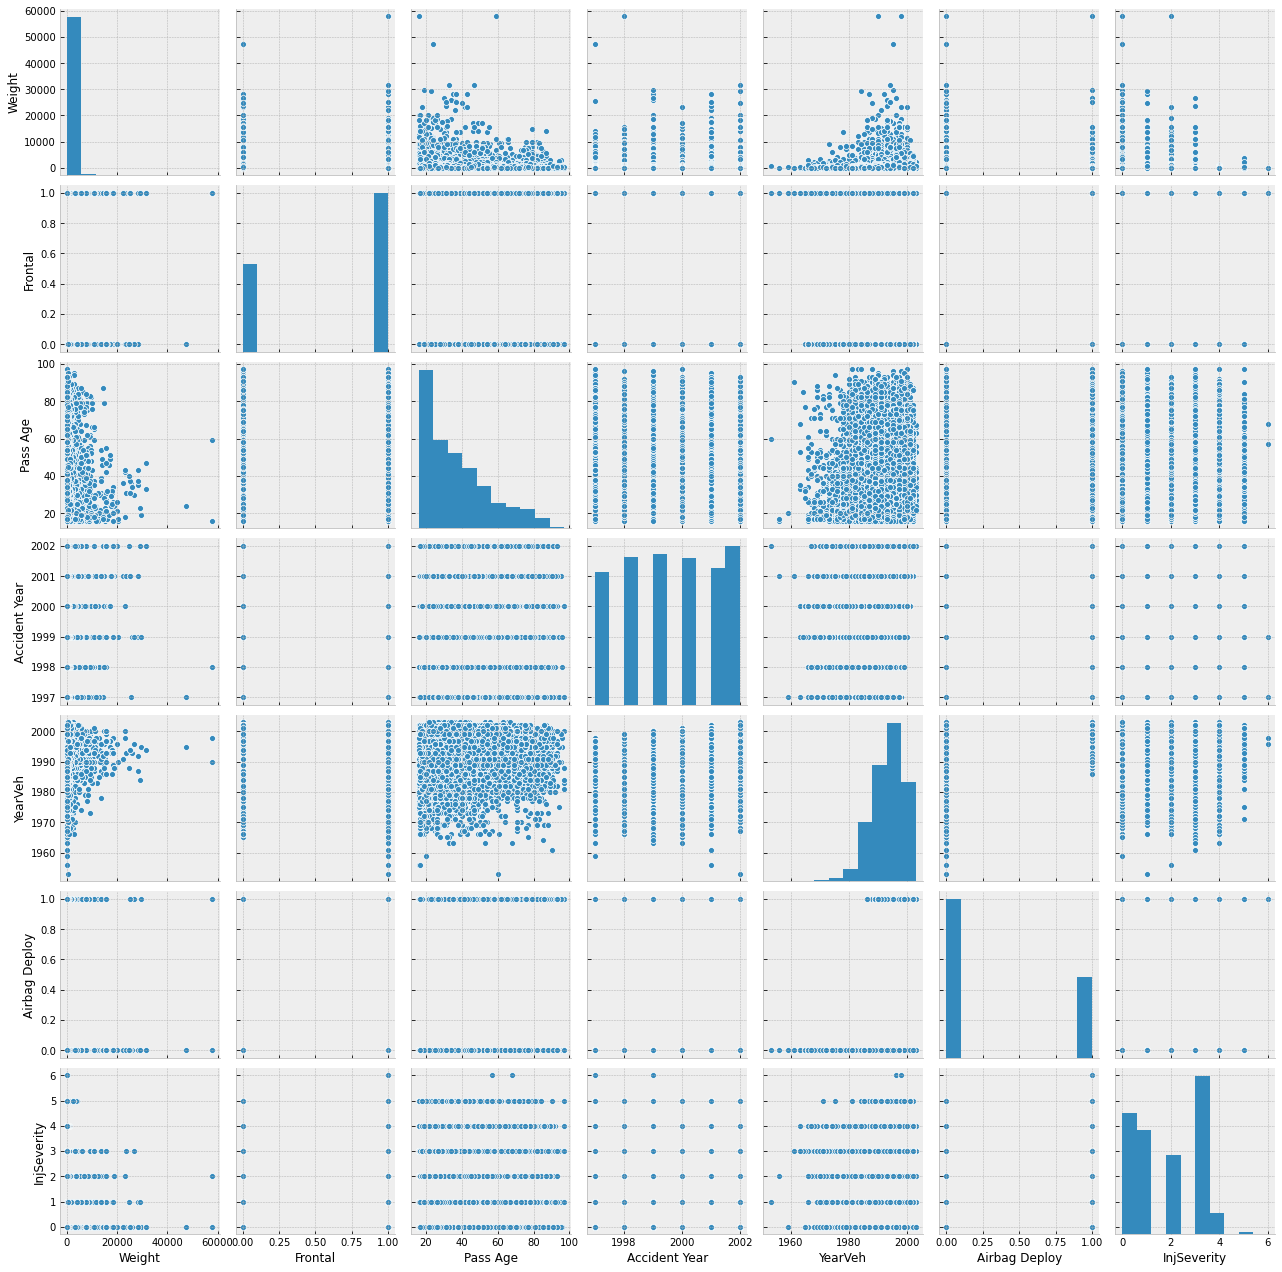

In [34]:
sns.pairplot(nassCDS2)

In [79]:
 nassCDS2.corr()

,Weight,Frontal,Pass Age,Accident Year,YearVeh,Airbag Deploy,InjSeverity
Weight,1.000000,-0.009400,-0.030488,0.009643,-0.011289,-0.061727,-0.203043
Frontal,-0.009400,1.000000,-0.044253,0.014686,-0.028896,0.230715,-0.022693
Pass Age,-0.030488,-0.044253,1.000000,-0.006932,0.016451,0.008052,0.091336
Accident Year,0.009643,0.014686,-0.006932,1.000000,0.296406,0.120818,-0.041937
YearVeh,-0.011289,-0.028896,0.016451,0.296406,1.000000,0.481922,-0.076957
Airbag Deploy,-0.061727,0.230715,0.008052,0.120818,0.481922,1.000000,0.063642
InjSeverity,-0.203043,-0.022693,0.091336,-0.041937,-0.076957,0.063642,1.000000


In [18]:
Q1 = nassCDS2['Weight'].quantile(0.25)
Q3 = nassCDS2['Weight'].quantile(0.75)
IQR = Q3 - Q1

print(IQR)
print("Lower Weight bound: ", Q1 - 1.5 * IQR)
print("Upper Weight bound: ", Q3 + 1.5 * IQR)

332.2499999967408
Lower Weight bound:  -465.90799999539803
Upper Weight bound:  863.0919999915652


In [19]:
##You can also ckeck for outliers uing the skewness value of of the variable. It should ideally be between -1(left) and +1(Right)
## The higher the value in either direction the more extreme values present in the distribution
print(nassCDS2['Weight'].skew())

14.310493861238584


In [20]:
##Create a new variable nassCDS21 removing the outliers, erroneous and missing values
nassCDS21 = nassCDS2[~((nassCDS2['Weight'] < (Q1 - 1.5 * IQR)) | (nassCDS2['Weight'] > (Q3 + 1.5 * IQR)))]
nassCDS21 = nassCDS21[~((nassCDS21['Fatality'] == 'alive') & (nassCDS21['InjSeverity'] == 4.0))]
##convert entries 5 and 6 in the 'InjSeverity' variable to missing values as to give to useful information
nassCDS21['InjSeverity'] = nassCDS21['InjSeverity'].replace((5,6), np.nan)
nassCDS21 = nassCDS21.dropna()
print(nassCDS21.shape)
print(nassCDS21['Weight'].skew())

(22824, 14)
1.680127748905651


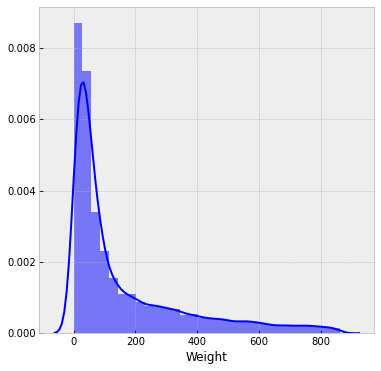

In [15]:
##Plot a histogram of the resulting 'Weight' variable
plt.figure(figsize = (6, 6))
#plt.xlim(0,4000)
sns.distplot(nassCDS21['Weight'], color = 'blue', bins = 30, hist_kws = {'alpha': 0.5})

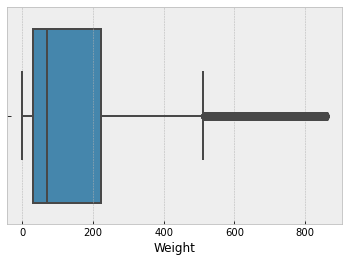

In [16]:
sns.boxplot(nassCDS21['Weight'])

In [73]:
##Check again for the benefit of doubt for missing values
nassCDS21.isnull().sum()

Speed Impact     0
Weight           0
Fatality         0
AirBag           0
Seatbelt         0
Frontal          0
Sex              0
Pass Age         0
Accident Year    0
YearVeh          0
Abcat            0
Role             0
Airbag Deploy    0
InjSeverity      0
dtype: int64

In [21]:
nassCDS21.head(10)

,Speed Impact,Weight,Fatality,AirBag,Seatbelt,Frontal,Sex,Pass Age,Accident Year,YearVeh,Abcat,Role,Airbag Deploy,InjSeverity
CaseID,,,,,,,,,,,,,,
2:3:1,25-39,25.069,alive,none,belted,1,f,26,1997,1990.0,unavail,driver,0,3.0
2:3:2,10-24,25.069,alive,airbag,belted,1,f,72,1997,1995.0,deploy,driver,1,1.0
2:10:1,25-39,495.444,alive,airbag,belted,1,f,53,1997,1995.0,deploy,driver,1,1.0
2:11:1,25-39,25.069,alive,none,belted,1,f,32,1997,1988.0,unavail,driver,0,3.0
2:11:2,40-54,25.069,alive,none,belted,1,f,22,1997,1985.0,unavail,driver,0,3.0
2:13:1,55+,27.078,alive,none,belted,1,m,22,1997,1984.0,unavail,driver,0,3.0
2:13:2,55+,27.078,dead,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0
2:14:1,10-24,812.869,alive,none,belted,0,m,40,1997,1984.0,unavail,driver,0,1.0
2:14:2,10-24,812.869,alive,none,belted,1,f,18,1997,1987.0,unavail,driver,0,0.0


In [17]:
unique_counts = nassCDS21.from_records([(col, nassCDS21[col].nunique()) for col in nassCDS21.columns],
                                      columns = ['Column Name', 'Num_Unique']).sort_values(by = ['Num_Unique'])
unique_counts

,Column Name,Num_Unique
2,Fatality,2
3,AirBag,2
4,Seatbelt,2
5,Frontal,2
6,Sex,2
11,Role,2
12,Airbag Deploy,2
10,Abcat,3
0,Speed Impact,5
13,InjSeverity,5


In [22]:
##Convert some of the variables to categorical
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories = ['1-9km/h', '10-24', '25-39', '40-54', '55+'], ordered = True)
nassCDS21['Speed Impact'] = nassCDS21['Speed Impact'].astype(status_type)

nassCDS21 = nassCDS21.astype({"Fatality": 'category', "AirBag": 'category', "Seatbelt": 'category',
                             "Frontal": 'category', "Sex": 'category', "YearVeh": 'int64',
                             "Role": 'category', "Airbag Deploy": 'category', "InjSeverity": 'category'})
#####OR#####

#nassCDS21['Fatality'] = nassCDS21['Fatality'].astype('category')
#nassCDS21['Airbag'] = nassCDS21['Airbag'].astype('category')
#nassCDS21['Seatbelt'] = nassCDS21['Seatbelt'].astype('category')
#nassCDS21['Frontal'] = nassCDS21['Frontal'].astype('category')
#nassCDS21['Sex'] = nassCDS21['Sex'].astype('category')
#nassCDS21['Abcat'] = nassCDS21['Abcat'].astype('category')
#nassCDS21['Role'] = nassCDS21['Role'].astype('category')
#nassCDS21['Airbag Deploy'] = nassCDS21['Airbag Deploy'].astype('category')
#nassCDS21['InjSeverity'] = nassCDS21['InjSeverity'].astype('category')

In [23]:

nassCDS21.dtypes

Speed Impact     category
Weight            float64
Fatality         category
AirBag           category
Seatbelt         category
Frontal          category
Sex              category
Pass Age            int64
Accident Year       int64
YearVeh             int64
Abcat              object
Role             category
Airbag Deploy    category
InjSeverity      category
dtype: object

In [20]:
pd.crosstab(nassCDS21['Fatality'],nassCDS21['Seatbelt'] ,normalize = True, margins = True)

Seatbelt,belted,none,All
Fatality,,,
alive,0.671837,0.276639,0.948475
dead,0.021819,0.029706,0.051525
All,0.693656,0.306344,1.000000


###### The above output shows a strong positive correlation between use of seatbelts and chances of surviving a car crash. 69.37% of the sample used seatbelts at the time of the crash out of which approximately 97% survived. However the result also shows a weak positive correlation between not using a seatbelt and chances of survival. 30.63% of the sample did not use a seatbelt at the time of the crash out of which 90.3% survived. This suggests that there could be other factors responsible for the survival of those without seatbelts

In [21]:
pd.crosstab(nassCDS21['InjSeverity'], nassCDS21['Airbag Deploy'], normalize = True, margins = True)

Airbag Deploy,0,1,All
InjSeverity,,,
0.0,0.149273,0.057878,0.207150
1.0,0.136304,0.077550,0.213854
2.0,0.096346,0.070803,0.167149
3.0,0.234709,0.129688,0.364397
4.0,0.033035,0.014415,0.047450
All,0.649667,0.350333,1.000000


##### The above shows the extent to which working Airbags helped in prevent serious injuries or fatalities from a crash. Injury severity is coded 0(no injury), 1(possible injury), 2(no disability), 3(disability) and 4(death) as fallouts of a crash. Airbags which were wither unavailable or didnt deploy at the time of the crash were coded 0 and 1 for deployment.
##### From the output above it can be deduced that safe deployment of Air bags during a crash could significant reduce chances of injury, disability or death from a car accident. Of the 20.71% of the total sample came out of a crash with no injuries, 27.9% of them had their airbags safely deployed. 63.74% of those who possibly sustained injuries, 57.64% of those who were injured but didnt suffer permanent disability, 64.41% of those that suffered permanent disability and 69.62% of those that suffered permanent disability as a result of the car accident either had no airbag or it didnt deploy

In [22]:
pd.crosstab(nassCDS21['Fatality'],nassCDS21['Speed Impact'] ,normalize = True, margins = True)

Speed Impact,1-9km/h,10-24,25-39,40-54,55+,All
Fatality,,,,,,
alive,0.021951,0.457326,0.313661,0.109578,0.045960,0.948475
dead,0.000131,0.004995,0.013188,0.015072,0.018139,0.051525
All,0.022082,0.462320,0.326849,0.124649,0.064099,1.000000


##### There is a connection between Speed on Impact and Fatality rate. As Speed Impact increased from ranges 1-9km/hr, 10-24km/hr, 25-39km/hr, 40-54km/hr and 55+km/hr, fatality rate were 0.59%, 1.08%, 4.04%,12.09% and 28.3% respectively. This suggests that fatality rate increases as speed on impact increases.  

In [89]:
pd.crosstab([nassCDS21['Fatality'], nassCDS21['Airbag Deploy']],nassCDS21['Role'] ,normalize = True, margins = True)

Role                      driver      pass       All
Fatality Airbag Deploy                              
alive    0              0.467227  0.146994  0.614222
         1              0.279224  0.055030  0.334253
dead     0              0.026288  0.009157  0.035445
         1              0.012618  0.003461  0.016080
All                     0.785358  0.214642  1.000000

##### Drivers were more of the fatalities among those involved in car crashes especially among those whose airbags didnt deploy as they accounted for 74.17% of the deaths in that category. Also among those with their airbags safely deployed the accounted for 78.47% of the deaths.

In [23]:
pd.crosstab(nassCDS21['Fatality'], nassCDS21['Sex'], normalize = True, margins = True)

Sex,f,m,All
Fatality,,,
alive,0.444751,0.503724,0.948475
dead,0.020286,0.031239,0.051525
All,0.465037,0.534963,1.000000


#### Male casualties were marginally higher than Females. Of the approximately 5.15% who were killed in these accidents, 60.63% were male while 39.37% were female

In [45]:
##Find the number of fatalities based on the Passenger Age variable
nassCDS21.groupby(['Fatality']).agg({'Pass Age': "count"})

,Pass Age
Fatality,
alive,21648
dead,1176


In [47]:
#Group survival or death by different Passenger Age values
pd.crosstab(nassCDS21['Fatality'], nassCDS21['Pass Age'])

Pass Age,16,17,18,19,20,21,22,23,24,25,...,88,89,90,91,92,93,94,95,96,97
Fatality,,,,,,,,,,,,,,,,,,,,,
alive,697,880,916,908,807,764,650,598,602,583,...,22,16,7,6,4,9,2,1,2,3
dead,24,25,37,39,29,33,37,27,18,26,...,10,5,2,4,2,0,0,0,0,1


In [81]:
##Find which passenger age value recorded the most deaths
age = nassCDS21.loc[nassCDS21['Fatality'] == 'dead', 'Pass Age'].value_counts().idxmax()
numb = nassCDS21.loc[nassCDS21['Fatality'] == 'dead', 'Pass Age'].value_counts().max()
print(age, numb)

19 39


In [82]:
##Find too the Pssenger Age value with the least deaths
age1 = nassCDS21.loc[nassCDS21['Fatality'] == 'dead', 'Pass Age'].value_counts().idxmin()
numb1 = nassCDS21.loc[nassCDS21['Fatality'] == 'dead', 'Pass Age'].value_counts().min()

print(age1, numb1)

97 1


In [72]:
pd.crosstab(nassCDS21['Fatality'], nassCDS21['YearVeh'])

YearVeh,1953,1956,1959,1961,1963,1964,1965,1966,1967,1968,...,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003
Fatality,,,,,,,,,,,,,,,,,,,,,
alive,1,2,1,1,3,1,4,12,7,9,...,1490,1682,1521,1585,1557,1397,1084,612,320,28
dead,0,0,0,0,1,0,0,3,1,1,...,76,95,59,62,45,35,57,23,16,1


In [79]:
##Find the vehicle year that recorded most deaths
Year = nassCDS21.loc[nassCDS21['Fatality'] == 'dead', 'YearVeh'].value_counts().idxmax()
number = nassCDS21.loc[nassCDS21['Fatality'] == 'dead', 'YearVeh'].value_counts().max()
print(Year, number)

1995 95


In [76]:
#nassCDS21.loc[nassCDS21['Fatality'] == 'dead', 'YearVeh'].value_counts().idxmin()

1967

In [25]:
nassCDS21 = nassCDS21.drop(['Abcat'], axis = 1)
nassCDS21.shape

(22824, 13)

In [27]:
nassCDS21.head(5)

,Speed Impact,Weight,Fatality,AirBag,Seatbelt,Frontal,Sex,Pass Age,Accident Year,YearVeh,Role,Airbag Deploy,InjSeverity
CaseID,,,,,,,,,,,,,
2:3:1,25-39,25.069,alive,none,belted,1,f,26,1997,1990,driver,0,3.0
2:3:2,10-24,25.069,alive,airbag,belted,1,f,72,1997,1995,driver,1,1.0
2:10:1,25-39,495.444,alive,airbag,belted,1,f,53,1997,1995,driver,1,1.0
2:11:1,25-39,25.069,alive,none,belted,1,f,32,1997,1988,driver,0,3.0
2:11:2,40-54,25.069,alive,none,belted,1,f,22,1997,1985,driver,0,3.0


## Predictive modelling using Random Forest

#### For a highly skewed variable of our interest (Fatality), class inbalance could lead to inaccurate classification performance. It becomes very important to address this through the concept of 'weighting'. First we make a plot of the class of interest to confirm its inbalance or otherwise

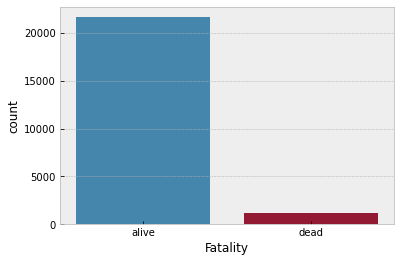

In [28]:
sns.countplot(nassCDS21['Fatality'])

#### It is clear from the plot above that the 'Fatality' variable is inbalanced as there is an overwhelming number of front seat passengers who made it out of an accident alive than those who died.
#### Using the typical accuracy score to measure the performance of the model will be highly misleading as it would most likely yield high accuracy, since the overwhemling majority of the class are 'alive'. But it would also misclassify the 'dead' and we dont want that


In [37]:
##First hot code the categorical variables in the dataframe
df = pd.get_dummies(nassCDS21, columns = ['Speed Impact', 'AirBag', 'Seatbelt', 'Frontal',
                                         'Sex', 'Role', 'Airbag Deploy', 'InjSeverity'])
df.reset_index(drop = True, inplace = True) ##This resets and drop the index column
df.head()

,Weight,Fatality,Pass Age,Accident Year,YearVeh,Speed Impact_1-9km/h,Speed Impact_10-24,Speed Impact_25-39,Speed Impact_40-54,Speed Impact_55+,...,Sex_m,Role_driver,Role_pass,Airbag Deploy_0,Airbag Deploy_1,InjSeverity_0.0,InjSeverity_1.0,InjSeverity_2.0,InjSeverity_3.0,InjSeverity_4.0
0,25.069,alive,26,1997,1990,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,25.069,alive,72,1997,1995,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
2,495.444,alive,53,1997,1995,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
3,25.069,alive,32,1997,1988,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
4,25.069,alive,22,1997,1985,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [41]:
##We proceed to build our Machine Learning model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix

y = df.Fatality
X = df.drop('Fatality', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print("Size of the train dataset: ", len(X_train))
print("Size of the test dataset: ", len(X_test))

Size of the train dataset:  15976
Size of the test dataset:  6848


In [42]:
clf = RandomForestClassifier(random_state =0, n_jobs = -1, n_estimators = 50, class_weight = 'balanced').fit(X_train, y_train)
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))

[[6510    0]
 [  24  314]]


In [43]:
print(clf.score(X_test, y_test)) ##This outputs the accuracy of the model

0.9964953271028038


In [44]:
accuracy = (6510 + 314)/(6510 + 24 + 314 + 0)
accuracy

0.9964953271028038

In [45]:
from sklearn.metrics import classification_report

print(classification_report(pred, y_test)) ##This outputs the precision, recall and other metrics of the model

              precision    recall  f1-score   support

       alive       1.00      1.00      1.00      6534
        dead       0.93      1.00      0.96       314

    accuracy                           1.00      6848
   macro avg       0.96      1.00      0.98      6848
weighted avg       1.00      1.00      1.00      6848



#### The performanace of this model judging by its accuracy shows that random forest remains one of the best techniques for modelling inbalanced data. Its score could have been attributed to overfitting but for the precision and recall scores. The scores for the 'dead' label shows that even though we missed a few number of the True Positives(24), most were correctly classified(6510).